In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Cargamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.chdir('..')

In [4]:
# Cargamos las dos tablas de datos
perfiles = pd.read_parquet('data/raw/flex_perfiles_usuario.parquet')
sesiones = pd.read_parquet('data/raw/flex_sesiones.parquet')

In [5]:
sesiones_validas = sesiones.idPerfil.isin(set(perfiles.idPerfiles))

In [6]:
sesiones_validas

0        False
1        False
2        False
3        False
4        False
         ...  
73545     True
73546     True
73547     True
73548     True
73549     True
Name: idPerfil, Length: 73550, dtype: bool

In [7]:
ultima_sesion = sesiones[sesiones_validas].sort_values(['idPerfil','fechaInicio'],ascending=False).groupby('idPerfil').first()

In [8]:
ultima_sesion = ultima_sesion[['fechaInicio', 'idImatt', 'lecho','sqr']]

In [9]:
perfiles_info = perfiles.set_index('idPerfiles')[['altura', 'peso', 'sexo', 'posicion', 'presiones']]

In [10]:
perfiles_sqr = perfiles_info.join(ultima_sesion, how='inner')

In [11]:
for col in ['altura', 'peso']:
    perfiles_sqr[col] = perfiles_sqr[col].str.replace(',','.').astype('float')

In [12]:
perfiles_sqr.describe(percentiles=([i*0.05 for i in range(20)]))

,altura,peso,idImatt,lecho,sqr
count,1551.000000,1551.000000,1551.000000,1551.000000,1544.000000
mean,161.574900,72.647389,591.691167,1.426821,1949.887249
std,44.955742,23.924077,250.459731,0.494775,7715.809630
min,0.000000,0.000000,10.000000,1.000000,-0.018808
0%,0.000000,0.000000,10.000000,1.000000,-0.018808
5%,1.585000,22.000000,132.000000,1.000000,3.085290
10%,156.000000,52.000000,218.000000,1.000000,15.385730
15%,160.000000,55.000000,282.000000,1.000000,19.660880
20%,160.000000,58.000000,348.000000,1.000000,22.870360
25%,162.500000,60.000000,415.000000,1.000000,26.555850


In [19]:
presiones_sqr_filtrado = perfiles_sqr[(perfiles_sqr["peso"]<150) 
                                      & (perfiles_sqr["peso"]!=0 )
                                      & (perfiles_sqr["altura"]>100) 
                                      & (perfiles_sqr["altura"]<220) 
                                      & (perfiles_sqr['sexo'] != 'Manual')
                                      & (perfiles_sqr['sqr'] > 0)
                                      & (perfiles_sqr['sqr'] < 100)].drop(columns = ['presiones', 'idImatt'])

In [20]:
presiones_sqr_filtrado.describe([i*0.05 for i in range(20)])

,altura,peso,lecho,sqr
count,667.000000,667.000000,667.000000,667.000000
mean,171.326837,77.081709,1.436282,33.245200
std,9.548890,17.056821,0.496296,18.234497
min,140.000000,35.000000,1.000000,0.039927
0%,140.000000,35.000000,1.000000,0.039927
5%,157.000000,52.000000,1.000000,5.447914
10%,160.000000,56.000000,1.000000,11.964100
15%,160.000000,59.000000,1.000000,16.059420
20%,162.000000,61.000000,1.000000,19.128240
25%,164.000000,64.000000,1.000000,20.688400


In [105]:
presiones_sqr_filtrado['imc'] = presiones_sqr_filtrado['peso']/presiones_sqr_filtrado['altura']**2

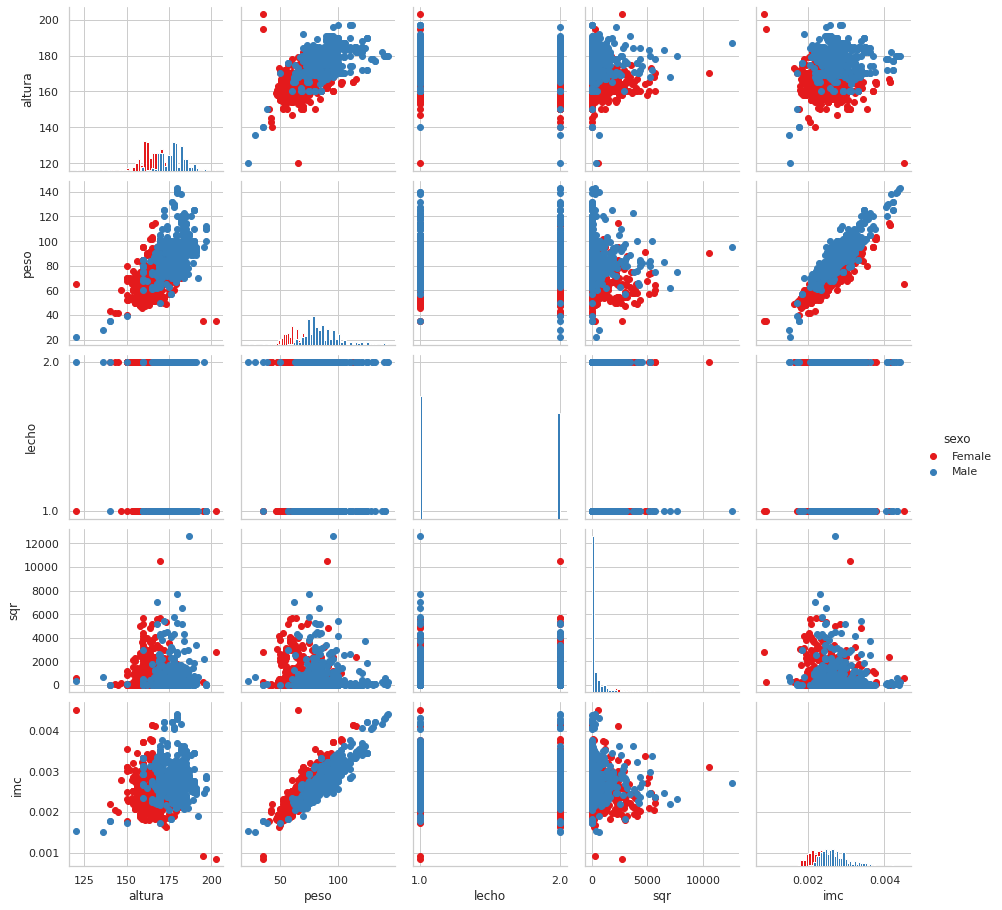

In [155]:
sns.set_style("whitegrid")
sns.set_palette("Set1")

g = sns.PairGrid(presiones_sqr_filtrado, hue="sexo")
g.map_diag(plt.hist, bins = 50)
g.map_offdiag(plt.scatter)
g.add_legend();

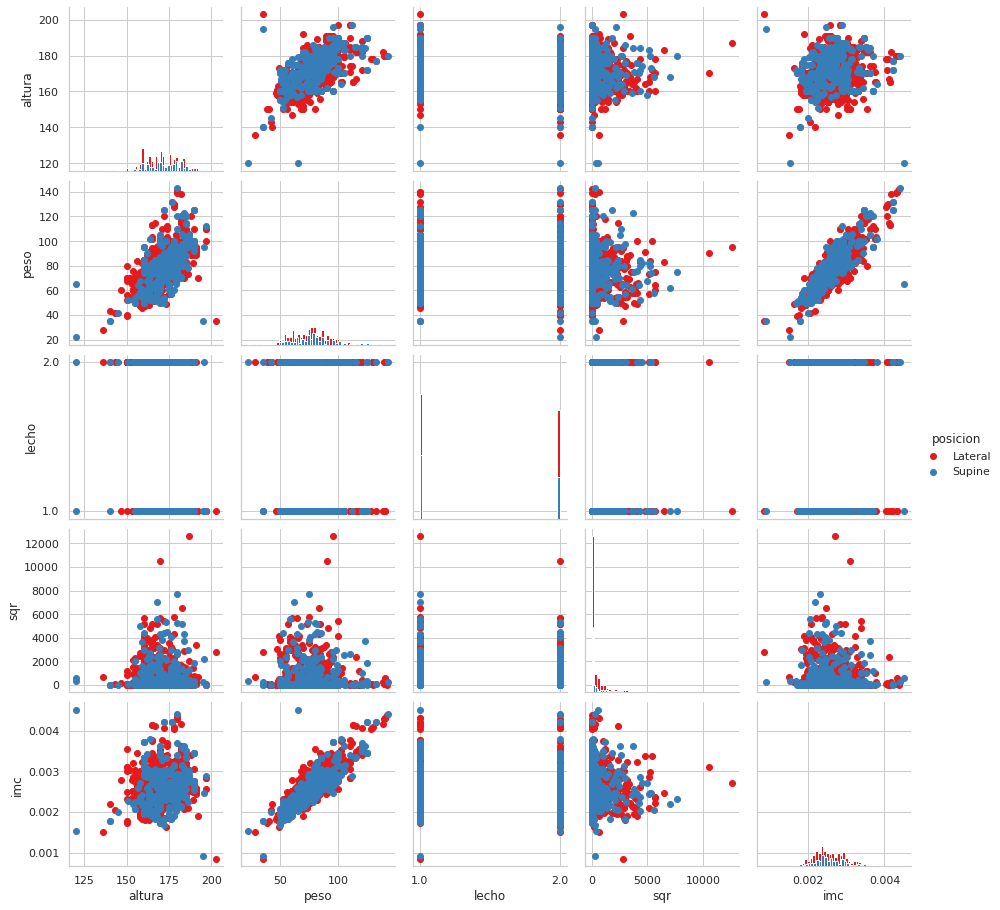

In [156]:
g = sns.PairGrid(presiones_sqr_filtrado, hue="posicion")
g.map_diag(plt.hist, bins=50)
g.map_offdiag(plt.scatter)
g.add_legend();

In [132]:
presiones_sqr_filtrado['lecho'] = presiones_sqr_filtrado.lecho.astype('str')

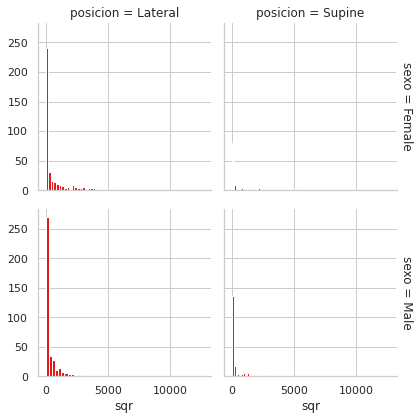

In [158]:
g = sns.FacetGrid(presiones_sqr_filtrado, row="sexo", col="posicion", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "sqr", bins=50);

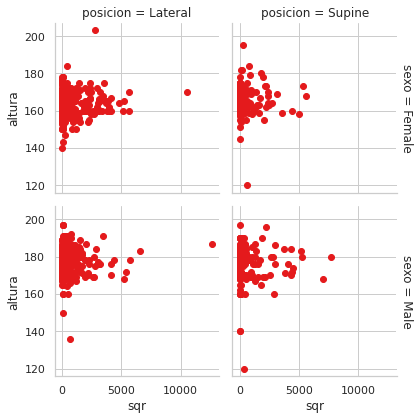

In [159]:
g = sns.FacetGrid(presiones_sqr_filtrado, row="sexo", col="posicion", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.scatter, "sqr", "altura");

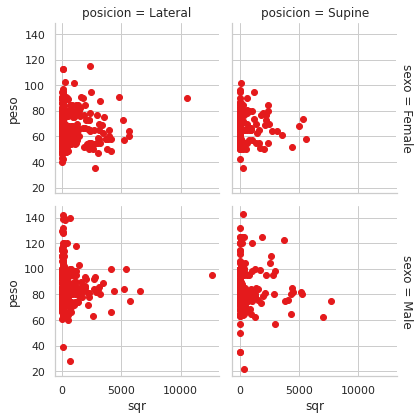

In [160]:
g = sns.FacetGrid(presiones_sqr_filtrado, row="sexo", col="posicion", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.scatter, "sqr", "peso");

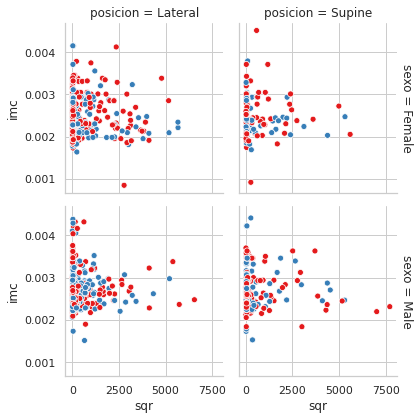

In [164]:
g = sns.FacetGrid(presiones_sqr_filtrado.query('sqr < 10000'), row="sexo", col="posicion", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(sns.scatterplot, "sqr", "imc", 'lecho', palette="Set1");

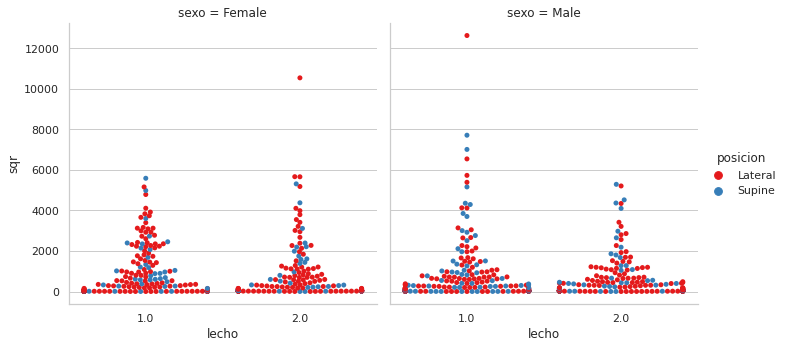

In [162]:
sns.factorplot("lecho", "sqr", "posicion", col="sexo", data=presiones_sqr_filtrado, kind="swarm");